# Case Study Data Description:
The data at hand contains medical costs of people characterized by certain attributes.
Domain:
Healthcare
Context:
Leveraging customer information is paramount for most businesses. In the case of an
insurance company, attributes of customers like the ones mentioned below can be crucial
in making business decisions. Hence, knowing to explore and generate value out of such
data can be an invaluable skill to have.


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;"> NOTE: EDA are listed below the red high-lighted text called Observations for plot:

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;">
1)Import necessary Packages to extract and load the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from matplotlib import pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;">
2)Read insurance.csv as a dataframe called Insurance.

In [2]:
insurance = pd.read_csv("insurance.csv")

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;">3)Perform basic EDA which should include the following and print out your insights
at every step. Check the head of the DataFrame to get sense of the header details

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;">(a) Shape of the data 

In [4]:
insurance.shape

(1338, 7)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;"> (b)Data type of each attribute

In [5]:
insurance.info()
insurance.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;">(c) Checking the presence of missing values
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">EDA Observations from data below:
    
    *No null values

In [6]:
#check for missing values
insurance.isna().apply(pd.value_counts) 

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;">(d) 5 point summary of numerical attributes   
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">    EDA Observations from data below:    
    
    *Data looks good and reasonable.
    
    *Age column represents adult population data.
    
    *Children column represent few have more than 2 children.    

In [7]:
#5 point summary of numerical attributs
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;"> (e)   Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">   EDA Observations from Plots:    
<span style="font-family: Arial; font-weight:bold;font-size:0.9em;color:Royalblue;">    
    * Normal distribution for BMI,perfect Bell curve
    * Uniform distribution for Age, most of the respective age Y axis remains nearly constant.
    * Charges is Right Skewed=(Mean>Median)

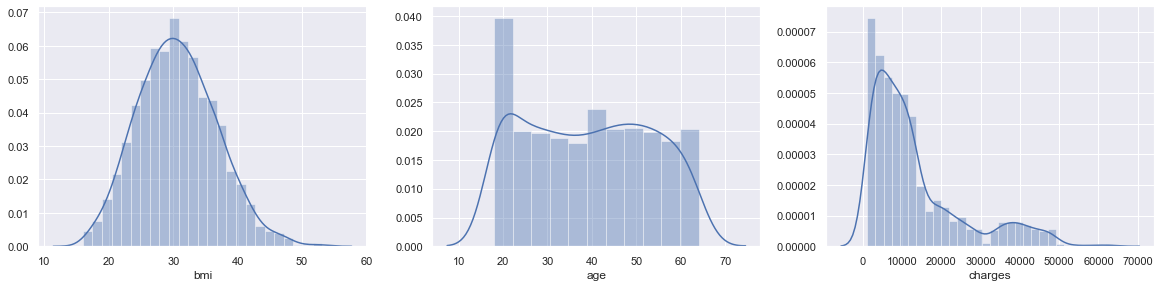

In [8]:
#find EDA above in red
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(insurance['bmi'])

plt.subplot(3,3,2)
sns.distplot(insurance['age'])

plt.subplot(3,3,3)
sns.distplot(insurance['charges'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;">(f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Red;"> EDA Observations :
    
    *Age has no skew
    *BMI has relatively lesser skew
    *charges are highly skewed
    

In [9]:
#EDA observation as above
Skewnesss=pd.DataFrame({'Skewnesss':[stats.skew(insurance['bmi']),stats.skew(insurance['age']),stats.skew(insurance['charges'])]}
                      ,index=['bmi','age','charges'])
Skewnesss

,Skewnesss
bmi,0.283729
age,0.055610
charges,1.514180


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;">(g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Red;"> Observations for BMI plot:
    
    *Above plot shows seven points greater than 46 these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

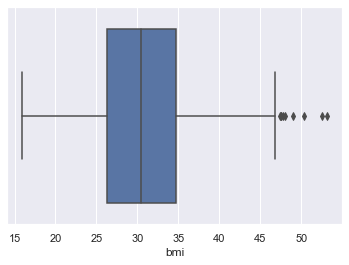

In [10]:
#find EDA above in red only for BMI
sns.boxplot(x=insurance['bmi'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;"> Observations for the above plot based on Z test BMI

In [11]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(insurance['bmi']))   # get the z-score of every value with respect to their columns
print(z)

[0.45332    0.5096211  0.38330685 ... 1.0148781  0.79781341 0.26138796]


In [12]:
threshold = 3
np.where(z > threshold)

(array([ 116,  847, 1047, 1317], dtype=int64),)

In [13]:
print(z[116])

3.0178611981425605


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;"> Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Red;"> Observations for Age plot:
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Royalblue;">    *No Outliers

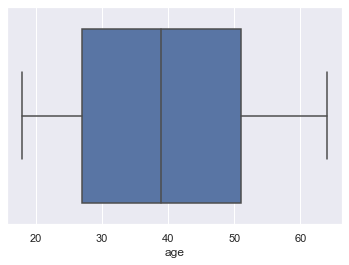

In [14]:
#find EDA above in red only for age
sns.boxplot(x=insurance['age'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;"> Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Red;"> Observations for Charges plot:
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;">    *Below plot shows many points greater than 35000, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

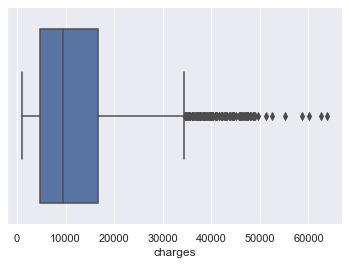

In [15]:
#find EDA above in red only for charges
sns.boxplot(x=insurance['charges'])


 <span style="font-family: Arial; font-weight:bold;font-size:2em;color:Royalblue;">(h) Distribution of categorical columns (include children) 
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">Observations from Plot below:    

<span style="font-family: Arial; font-weight:bold;font-size:1em;">  
    *Region-wise Southeast has highest count, while for other regions its even.    
    *There are lot more non-smokers than smokers in data.
    *Children plot shows there are more less than 2 childrean while quite few with 4 or 5 children.    
    *Bmi plot is normally distributed    
    *Age spread evenly across adult group.

Text(0, 0.5, 'count')

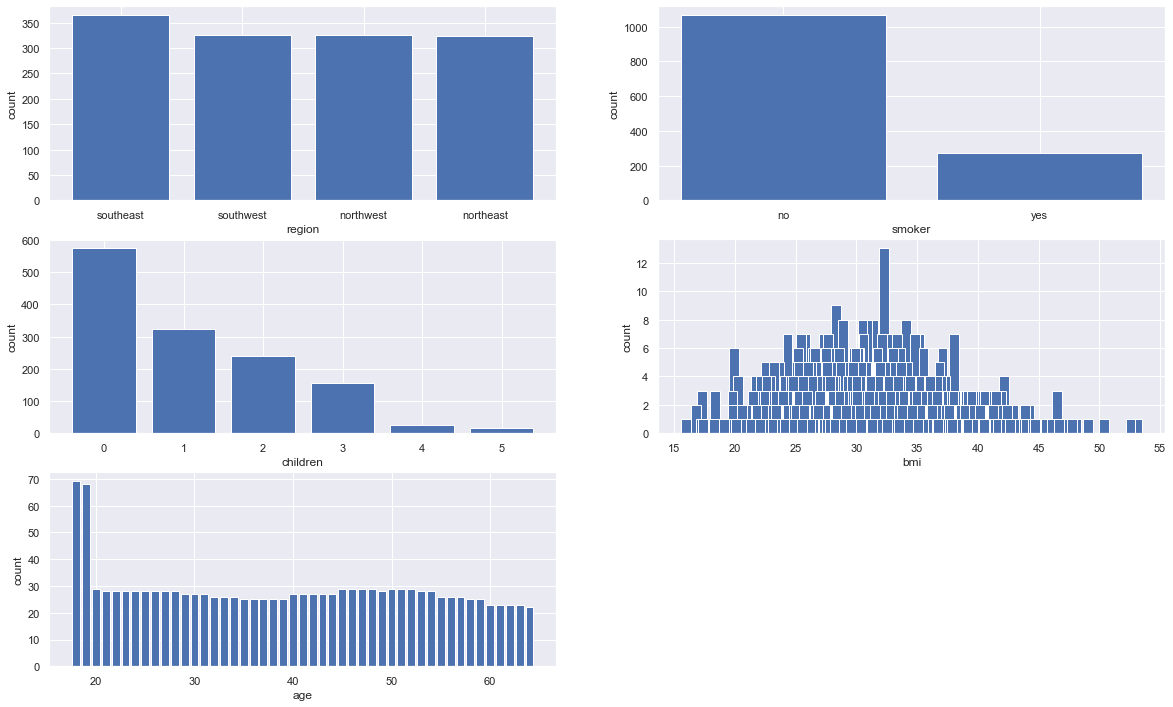

In [16]:
#please find the observations above
plt.figure(figsize=(20,25))
plt.subplot(6,2,1)
x1=insurance['region'].value_counts().index
y1=[insurance['region'].value_counts()[l] for l in x1]
plt.bar(x1,y1)
plt.xlabel('region')
plt.ylabel('count')

plt.subplot(6,2,2)
x2=insurance['smoker'].value_counts().index
y2=[insurance['smoker'].value_counts()[m] for m in x2]
plt.bar(x2,y2)
plt.xlabel('smoker')
plt.ylabel('count')

plt.subplot(6,2,3)
x3=insurance['children'].value_counts().index
y3=[insurance['children'].value_counts()[o] for o in x3]
plt.bar(x3,y3)
plt.xlabel('children')
plt.ylabel('count')

plt.subplot(6,2,4)
x4=insurance['bmi'].value_counts().index
y4=[insurance['bmi'].value_counts()[p] for p in x4]
plt.bar(x4,y4)
plt.xlabel('bmi')
plt.ylabel('count')

plt.subplot(6,2,5)
x5=insurance['age'].value_counts().index
y5=[insurance['age'].value_counts()[q] for q in x5]
plt.bar(x5,y5)
plt.xlabel('age')
plt.ylabel('count')

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:Royalblue;">(i) Pair plot that includes all the columns of the data frame 

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">Observations from Plot below:    

<span style="font-family: Arial; font-weight:bold;font-size:1em;">   
    
    *As age increases charges decreases, there are 3 thick lines of data concentration
    
    *Children and age is horizontal line, constant
    
    *Bmi increases age decreases
    
    *Charges decreases as the value of children increases
    
    *bmi and charges cannot be predicted.
    
    *age and bmi is quite concentrated and cannot be predicted.

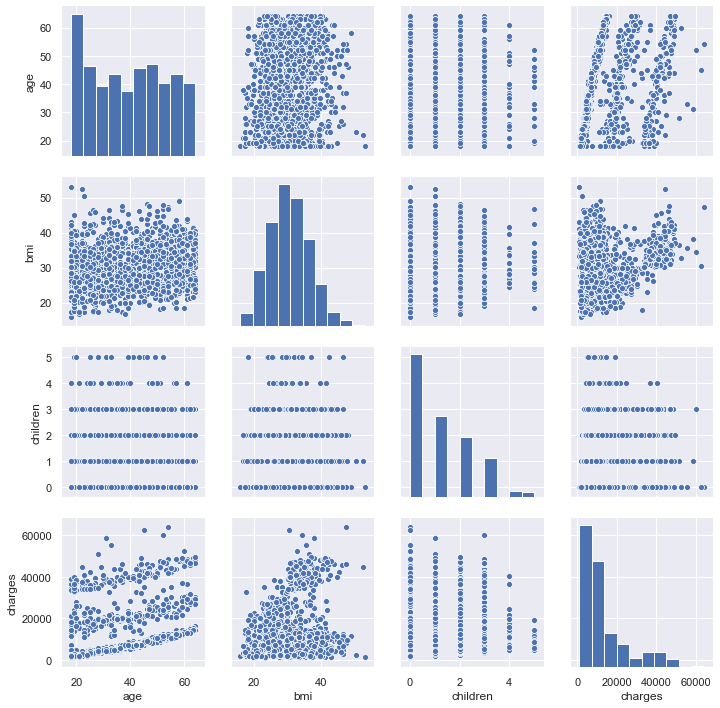

In [17]:
sns.pairplot(insurance[['age','sex','bmi','children','smoker','region','charges']])
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;"> 4) Answer the following questions with statistical evidence
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;"> (a) Do charges of people who smoke differ significantly from the people who don't
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:red;">EDA Observation from Below Plot:
<span style="font-family: Arial; font-weight:bold;font-size:.8em;"> 
    
    *People who smoke have high charges to people who dont.
    *therefore charges differ significantly for both.
    

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:red;">Visual Observations:

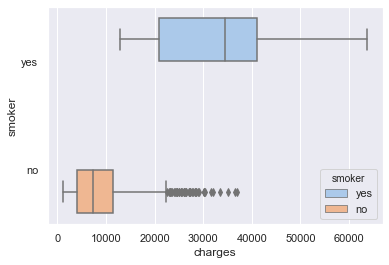

In [18]:
sns.set_palette("pastel")
sns.boxplot(insurance['charges'], insurance['smoker'], hue=insurance['smoker'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:red;">Statistical Observation
    
<span style="font-family: Arial; font-weight:bold;font-size:1em">    Assumptions:
    
    Ho:charges of smoker and non-smoker are same
    
    Ha: charges of smoker and non smokers are not same

In [19]:
dataframe_y = pd.DataFrame(insurance[insurance['smoker'] == 'yes'].charges)
dataframe_n = pd.DataFrame(insurance[insurance['smoker'] == 'no'].charges)

t,p_value = stats.ttest_ind(dataframe_y,dataframe_n ,axis = 0)

if p_value < 0.05: print(f'charges of smoker and non smokers are not same ({p_value}) < 0.05')
else: print(f'charges of smoker and non smokers are same({p_value}) > 0.05')

charges of smoker and non smokers are not same ([8.27143584e-283]) < 0.05


 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Royalblue;">(b)Does bmi of males differ significantly from that of females
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">Observations from Plot below:    

<span style="font-family: Arial; font-weight:bold;font-size:1em;">    *BMI does not differ.
     
     

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:red;">Visual observation:

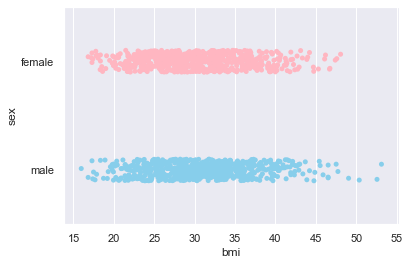

In [20]:
sns.stripplot(insurance['bmi'], insurance['sex'],palette=['lightpink','skyblue'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:red;">Statistical testing
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Assumptions:
    
    Ho:bmi does not differ with gender
    
    Ha:bmi differ with gender

In [21]:
dataframe_male = pd.DataFrame(insurance[insurance['sex'] == 'male'].bmi)
dataframe_female = pd.DataFrame(insurance[insurance['sex'] == 'female'].bmi)

In [22]:
t, p_value = stats.ttest_ind(dataframe_male,dataframe_female,axis = 0)

In [23]:
if p_value < 0.05:
    print(f'bmi differ with gender, p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'bmi does not differ with gender, p_value ({p_value.round(3)}) > 0.05')

bmi does not differ with gender, p_value ([0.09]) > 0.05


 <span style="font-family: Arial; font-weight:bold;font-size:2em;color:Royalblue;"> (c)Is the proportion of smokers significantly different in different genders?
    
 <span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">   Assumptions:
     
     *'sex' and 'smoker' are two categorical variables
     *We want to see if the proportion of smokers in the female population is significantly less than it is in the male population
            Ho = The proportions are equal
            Ha = The two proportions are not equal
 <span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">  Observations from below:
     
     
 <span style="font-family: Arial; font-weight:bold;font-size:1em;"> 
     *Therefore there are significantly quite negligible proportion difference in smokers in different genders.

In [24]:
crosstab = pd.crosstab(insurance['sex'],insurance['smoker'])

In [25]:
crosstab.T

sex,female,male
smoker,,
no,547,517
yes,115,159


In [26]:
female_smokers = insurance[insurance['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = insurance[insurance['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = insurance.sex.value_counts()[1] # number of females in the data
n_males = insurance.sex.value_counts()[0] #number of males in the data

In [27]:
from statsmodels.stats.proportion import proportions_ztest

stat, p_value = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

In [28]:
print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [29]:
if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant. then |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. then |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. then |We reject the null|


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:Royalblue;">(d) Is the distribution of bmi across women with no children, one child and two children, the same
  
  
  <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:red;"> Assumptions:
      * Ho = Distribution of bmi is  same w.r.t no of children
      * Ha =  distribution of bmi is not same w.r.t no of children
      *alpha = 0.05  # significance level
    
  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">  Observations from Plot below:
    
   *BMI distribution is negligible variation for no child, one Child and 2 Child from plot. The one way ANOVA test proves that there is no effect of bmi on number of children woman has.i.e, bmi is same accross women with 0,1,2 children.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">  Observations for statistical calculations:

In [30]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
female_sample = insurance[insurance['sex'] == 'female']
female_zero_bmi = female_sample[female_sample['children'] == 0]['bmi']
female_one_bmi= female_sample[female_sample['children'] == 1]['bmi']
female_two_bmi = female_sample[female_sample['children'] == 2]['bmi']

f_stat, p_value = stats.f_oneway(female_zero_bmi,female_one_bmi,female_two_bmi)

In [32]:
if p_value < 0.05:
    print(f'Distribution of bmi is not same w.r.t no of children, p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'Distribution of bmi is same w.r.t no of children, p_value ({p_value.round(3)}) > 0.05')

Distribution of bmi is same w.r.t no of children, p_value (0.716) > 0.05


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">  Visual Observations:

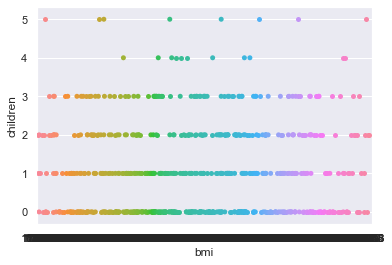

In [33]:
sns.stripplot(insurance['bmi'],insurance[insurance['sex']=='female']['children'])